In [49]:
import numpy as np

In [50]:
index_inputs = np.load(open('./train_inputs.npy', 'rb'))
index_outputs = np.load(open('./train_outputs.npy', 'rb'))
index_targets = np.load(open('./train_targets.npy', 'rb'))

type(index_inputs), type(index_outputs), type(index_targets)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [51]:
index_inputs[3:5]

array([[ 20,  30, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 93,   7,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [52]:
!python -m pip install konlpy

In [53]:
import preprocess as pp

In [54]:
prepro_configs = pp.json.load(open('./data_configs.json','r'))
type(prepro_configs)

dict

In [55]:
prepro_configs.keys()

dict_keys(['char2idx', 'idx2char', 'vocab_size', 'pad_symbol', 'std_symbol', 'end_symbol', 'unk_symbol'])

# make model

In [56]:
import tensorflow as tf

# encode model

In [57]:
vocab_size = prepro_configs['vocab_size']
latent_dim = 60

In [58]:
encode_input = tf.keras.Input(shape=(None,))
encode_hidden = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=latent_dim)(encode_input)
encode_output, state_h, state_c = tf.keras.layers.LSTM(50, return_state=True)(encode_hidden)
encode_states = [state_h, state_c]

# decode model

In [59]:
decode_input = tf.keras.Input(shape=(None,))
decode_hidden = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=latent_dim)(decode_input)
decode_lstm, _, _ = tf.keras.layers.LSTM(50, return_state=True, return_sequences=True)(decode_hidden, initial_state=encode_states)
decode_output = tf.keras.layers.Dense(vocab_size, activation='softmax')(decode_lstm)

In [60]:
model = tf.keras.models.Model(inputs=[encode_input, decode_input], outputs=decode_output)

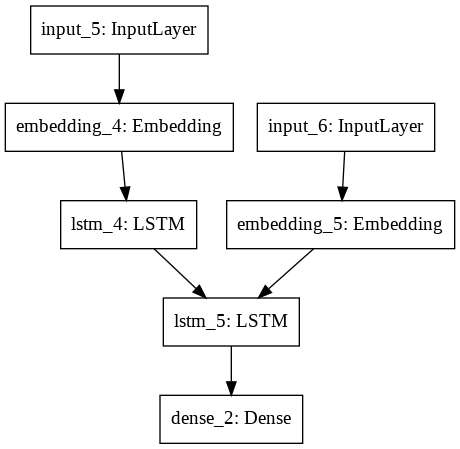

In [61]:
tf.keras.utils.plot_model(model)

In [62]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# fit

In [63]:
#type(index_inputs), type(index_outputs), type(index_targets)
model.fit(x=[index_inputs, index_outputs], y=index_targets, batch_size=128, epochs=50)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 4.7329 - acc: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 4.7179 - acc: 0.0020
Epoch 3/50
1/1 [==============================] - 0s 36ms/step - loss: 4.7036 - acc: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 30ms/step - loss: 4.6897 - acc: 0.0200
Epoch 5/50
1/1 [==============================] - 0s 33ms/step - loss: 4.6759 - acc: 0.1920
Epoch 6/50
1/1 [==============================] - 0s 32ms/step - loss: 4.6617 - acc: 0.8200
Epoch 7/50
1/1 [==============================] - 0s 39ms/step - loss: 4.6469 - acc: 0.8200
Epoch 8/50
1/1 [==============================] - 0s 40ms/step - loss: 4.6310 - acc: 0.8200
Epoch 9/50
1/1 [==============================] - 0s 36ms/step - loss: 4.6137 - acc: 0.8200
Epoch 10/50
1/1 [==============================] - 0s 32ms/step - loss: 4.5945 - acc: 0.8180
Epoch 11/50
1/1 [==============================] - 0s 35ms/step - loss: 4